## Logistic Regression

In [2]:
# Import all required libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean, std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [18]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))

X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

feature_cols = pickle.load(open("./common/feature_cols.p", "rb"))

### Find the best parameter in LR model

In [87]:
# Define the parameter grid
param_grid = [
    {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']},
    {'penalty': ['elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['saga'], 'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
    {'penalty': ['l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs']}
]

# Create a base model
logreg = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Perform Cross Validation

In [80]:
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))

# Define the model
# clf_cv = LogisticRegression(penalty='l1', C=1, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None, multi_class='auto')
clf_cv = LogisticRegression()

# Define metrics
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_micro', 'recall_micro', 'f1_micro']

# Define the cross-validation procedure
cv = KFold(n_splits=10)

# Evaluate the model using cross-validation
# demo_cols = ["cpu_usage","memory_usage","bandwidth_inbound","bandwidth_outbound","tps","response_time"] # 0.950478 0.957463 0.949599
# X = X[demo_cols]
scores = cross_validate(clf_cv, X, y, scoring=scoring, cv=cv, n_jobs=-1)

In [81]:
# Print scores
print('MACRO:')
print('Precision: %.4f (%.4f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.4f (%.4f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('F1 score: %.6f (%.4f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))
print()
print('MICRO:')
print('Precision: %.4f (%.4f)' % (mean(scores['test_precision_micro']), std(scores['test_precision_micro'])))
print('Recall: %.4f (%.4f)' % (mean(scores['test_recall_micro']), std(scores['test_recall_micro'])))
print('F1 score: %.4f (%.4f)' % (mean(scores['test_f1_micro']), std(scores['test_f1_micro'])))

MACRO:
Precision: 0.9497 (0.0961)
Recall: 0.9691 (0.0308)
F1 score: 0.950478 (0.0707)

MICRO:
Precision: 0.9903 (0.0081)
Recall: 0.9903 (0.0081)
F1 score: 0.9903 (0.0081)


### Feature Importance

In [72]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative so

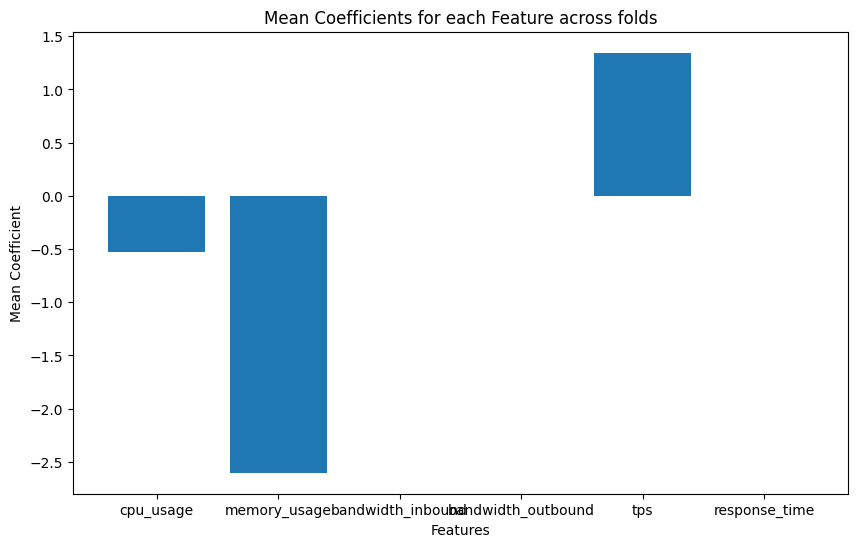

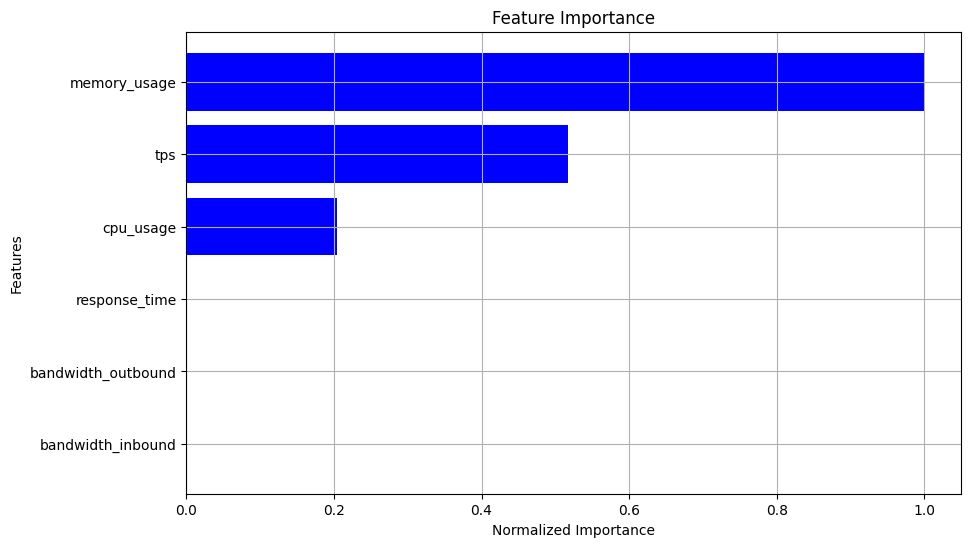

In [75]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))
feature_cols = pickle.load(open("./common/feature_cols.p", "rb"))

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize the array where we'll store the coefficients for each fold
coefficients = np.zeros((10, X.shape[1]))

# Prepare the cross-validation procedure
cv = KFold(n_splits=10)

logreg = LogisticRegression()

# Perform the cross-validation
for i, (train, test) in enumerate(cv.split(X)):
    # Split the data
    X_train, y_train = X[train], y[train]

    # fit the model with data
    logreg.fit(X_train, y_train)

    # Store the coefficients
    coefficients[i, :] = logreg.coef_[0]

# Calculate the mean coefficient for each feature across folds
mean_coefficients = coefficients.mean(axis=0)

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.bar(feature_cols, mean_coefficients)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Mean Coefficient')
plt.title('Mean Coefficients for each Feature across folds')

# Display the plot
plt.show()

# Normalize importance values
scaler = MinMaxScaler(feature_range=(0, 1))
importance_normalized = scaler.fit_transform(np.abs(mean_coefficients.reshape(-1, 1)))

# Create a DataFrame for easier manipulation
df_importance = pd.DataFrame(importance_normalized, columns=['importance'])
df_importance['feature'] = feature_cols

# Sort DataFrame by importance
df_importance = df_importance.sort_values(by='importance', ascending=True)

# Plot the Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(df_importance['feature'], df_importance['importance'], color='b', align='center')
plt.title('Feature Importance')
plt.xlabel('Normalized Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

### Drop the least important feature

Base F1 Score with all features: 0.9504781406241722
Sorted features by importance:    importance             feature
0    1.000000        memory_usage
1    0.517032                 tps
2    0.204057           cpu_usage
3    0.000251       response_time
4    0.000003  bandwidth_outbound
5    0.000000   bandwidth_inbound
New feature set: Index(['cpu_usage', 'memory_usage', 'bandwidth_outbound', 'tps',
       'response_time'],
      dtype='object')
Removed feature: bandwidth_inbound
New F1 Score: 0.8974036738726973
---------------------------------------
New feature set: Index(['cpu_usage', 'memory_usage', 'tps', 'response_time'], dtype='object')
Removed feature: bandwidth_outbound
New F1 Score: 0.8771537603578377
---------------------------------------
New feature set: Index(['cpu_usage', 'memory_usage', 'tps'], dtype='object')
Removed feature: response_time
New F1 Score: 0.8164494387659499
---------------------------------------
New feature set: Index(['memory_usage', 'tps'], dtype='obj

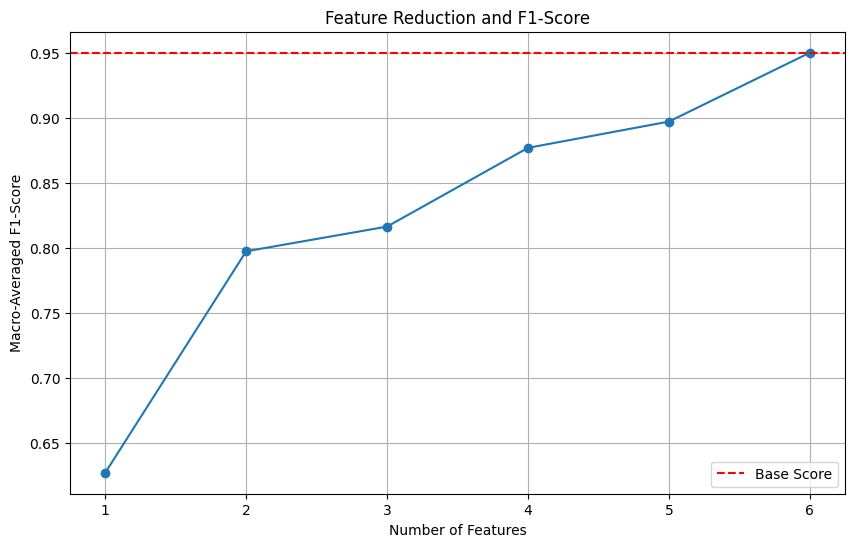

In [74]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))

# instantiate the logistic regression model
logreg = LogisticRegression()

# list to store mean F1-scores
mean_f1_scores = []

# prepare the cross-validation procedure
cv = KFold(n_splits=10)

# evaluate and store performance of full model
f1 = cross_val_score(logreg, X, y, scoring='f1_macro', cv=cv, n_jobs=-1).mean()
mean_f1_scores.append(f1)

# print base score
print(f'Base F1 Score with all features: {f1}')

# Get sorted features by importance
sorted_features = df_importance.sort_values(by='importance', ascending=False).reset_index(drop=True)

# print sorted features
print(f'Sorted features by importance: {sorted_features}')

X_reduced = X.copy()  # Create a copy of X

for i in range(len(sorted_features) - 1):
    logreg = LogisticRegression()

    # Drop the least important feature
    removed_feature = sorted_features.iloc[-(i+1)]['feature']
    X_reduced = X_reduced.drop(removed_feature, axis=1)

    # Train the model with the reduced feature set and calculate cross-validated F1 score
    f1 = cross_val_score(logreg, X_reduced, y, scoring='f1_macro', cv=cv, n_jobs=-1).mean()
    mean_f1_scores.append(f1)

    print(f'New feature set: {X_reduced.columns}\nRemoved feature: {removed_feature}\nNew F1 Score: {f1}')
    print('---------------------------------------')

# Plot the F1-scores
plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_features), 0, -1), mean_f1_scores, marker='o')

# Plot the base score
plt.axhline(y=mean_f1_scores[0], color='r', linestyle='--', label='Base Score')

plt.title('Feature Reduction and F1-Score')
plt.xlabel('Number of Features')
plt.ylabel('Macro-Averaged F1-Score')
plt.legend()
plt.grid(True)
plt.show()

### Train the model

In [106]:
# Create and train the model
clf = LogisticRegression(penalty='l1', C=1, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None)
clf.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, fit_intercept=False, penalty='l1', solver='liblinear')

In [107]:
# Use the model to make predictions on the test set
y_pred = clf.predict(X_test)

In [108]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9861431870669746
Precision: 0.9285714285714286
Recall: 0.8666666666666667
F1: 0.896551724137931


### Visualize the model

In [109]:
clf_matrix = confusion_matrix(y_test, y_pred)
clf_matrix

array([[401,   2],
       [  4,  26]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

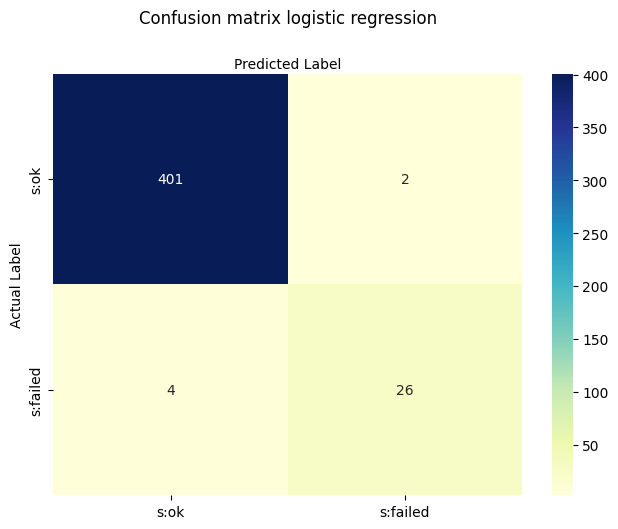

In [110]:
# Assuming clf_matrix is the confusion matrix you've computed
clf_matrix_df = pd.DataFrame(clf_matrix, index=["s:ok", "s:failed"], columns=["s:ok", "s:failed"])

# Create heatmap
class_names=["s:ok", "s:failed"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(clf_matrix_df, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix logistic regression', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Export the model

In [111]:
pickle.dump(clf, open("./models/logistic_regression.p", "wb"))